In [1]:
# testing recurrent NN


import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam


In [3]:

# Load data
Design_space = np.load('Design_space.npy')
moment_capacity = np.load('Mu.npy')

# Check shapes
print("Design_space shape:", Design_space.shape)
print("moment_capacity shape:", moment_capacity.shape)

# Reshape moment_capacity if necessary
if len(moment_capacity.shape) == 1:  # Assuming moment_capacity is 1D
    moment_capacity = moment_capacity.reshape(-1, 1)  # Reshape to a 2D array with one column


Design_space shape: (125000, 3)
moment_capacity shape: (125000,)



Epoch 1/50

6250/6250 [==============================] - 12s 2ms/step - loss: 9405.6611 - val_loss: 7321.1021
Epoch 2/50
6250/6250 [==============================] - 11s 2ms/step - loss: 6974.1108 - val_loss: 6981.4644
Epoch 3/50
6250/6250 [==============================] - 11s 2ms/step - loss: 6943.5938 - val_loss: 7028.3770
Epoch 4/50
6250/6250 [==============================] - 11s 2ms/step - loss: 6939.5122 - val_loss: 6939.7637
Epoch 5/50
6250/6250 [==============================] - 10s 2ms/step - loss: 6940.6382 - val_loss: 7249.0361
Epoch 6/50
6250/6250 [==============================] - 10s 2ms/step - loss: 6937.4741 - val_loss: 6949.8193
Epoch 7/50
6250/6250 [==============================] - 11s 2ms/step - loss: 6932.1445 - val_loss: 6931.9409
Epoch 8/50
6250/6250 [==============================] - 11s 2ms/step - loss: 6933.3384 - val_loss: 6933.0107
Epoch 9/50
6250/6250 [==============================] - 11s 2ms/step - loss: 6934.0117 - val_loss: 6928.7451
Epoch 10/50
6250/

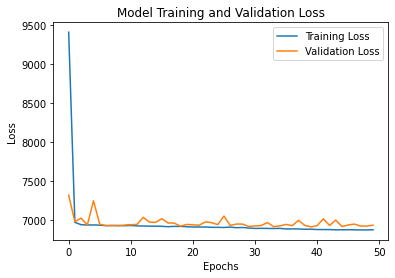

Model saved as 'rnn_model.h5'


C:\Users\adelpasand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [4]:

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(moment_capacity, Design_space, test_size=0.2, random_state=42)

# Reshape input data for LSTM
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])  # Reshape to (batch_size, timesteps, input_dim)
X_val = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])  # Reshape to (batch_size, timesteps, input_dim)

# Define input and output dimensions
input_dim = X_train.shape[2]
output_dim = Design_space.shape[1]

# Define the LSTM model
model = Sequential([
    LSTM(64, input_shape=(1, input_dim), activation='relu'),  # LSTM layer with 64 units
    Dense(output_dim)  # Output layer
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')  # Using mean squared error loss

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=16, verbose=1)

# Save the trained model
model.save('rnn_model.h5')
print("Model saved as 'rnn_model.h5'")





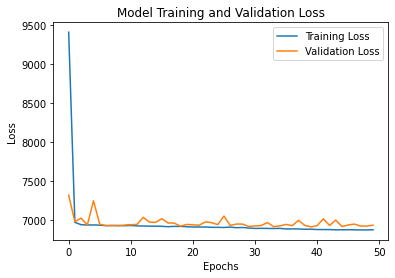

In [5]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()